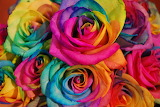

In [8]:
import numpy as np
import math
from PIL import Image
img = Image.open('tsvetok.jpg')
img

Усреднение с помощью скользящего окна

In [9]:
def blur(img, size):
    img_array = np.asarray(img, dtype='uint8').copy()
    width, height = len(img_array), len(img_array[0])
    left, right = int(size/2), size-int(size/2)
    for hor in range(left, width-right):
        for vert in range(left, height-right):
            sum = [0, 0, 0]
            for h in range(-left, right):
                for v in range(-left, right):
                    for c in range(3):
                        sum[c] += img_array[hor+h][vert+v][c]
            for c in range(3):
                img_array[hor][vert][c] = sum[c] / (size**2)
    return img_array

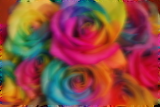

In [10]:
blur_img = Image.fromarray(blur(img, 4),'RGB')
blur_img

In [11]:
blur_img.size

(160, 107)

Взвешенное усреднение через функцию Гаусса

In [12]:
size = 4 # размер окна
sigma = 32 # значение сигма

In [13]:
def gaussian(size, sigma): #
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / (2 * np.pi * sigma**2)
    kernel = kernel / np.sum(kernel)
    return kernel
gaussian(size, sigma)

array([[0.06234756, 0.06243896, 0.06246946, 0.06243896],
       [0.06243896, 0.06253049, 0.06256103, 0.06253049],
       [0.06246946, 0.06256103, 0.06259159, 0.06256103],
       [0.06243896, 0.06253049, 0.06256103, 0.06253049]])

In [14]:
def gaussian_blur(img, size, sigma):
    img_array = np.array(img)
    output_array = np.zeros_like(img_array, dtype=np.float32)
    height, width, channels = img_array.shape
    pad_size = size // 2
    kernel = gaussian(size, sigma)
    for i in range(pad_size, height - pad_size):
        for j in range(pad_size, width - pad_size):
            for k in range(channels):
                output_array[i, j, k] = np.sum(kernel * img_array[i-pad_size:i+pad_size, j-pad_size:j+pad_size, k])
    return output_array.astype('uint8')

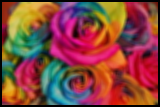

In [15]:
img1_array = gaussian_blur(img, size, 32)
Image.fromarray(img1_array,'RGB')


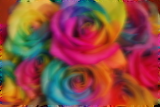

In [16]:
blur_img